### Análise Dos Preços Residenciais 

Objetivo: Neste notebook jupyter, exploraremos a base de clientes para entender o conjunto de dados geral. Para isso, vamos preparar os dados para visualizações e depois fazer a Análise Exploratória de Dados usando visualizações para obter insights.

Passos:

- Preparação dos dados para visualizações
<br>a. Limpe os dados
<br>b. Criar novos recursos
<br>c. Obtenha a visão geral dos dados
<br>d. Remover valores discrepantes

- Análise exploratória de dados
<br>a. Entenda cada variável
<br>b. Procurando por correlações

- Modelo de Construção
<br>a. selecionando o algoritmo de acordo com o valor RMSE
<br>b. modelo de construção com algoritmo selecionado


#### Importando Bibliotecas

In [ ]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import statsmodels.api as sm
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer 
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from warnings import filterwarnings 
filterwarnings('ignore')

#### Importando Dataset

In [2]:
df = pd.read_csv("train.csv")
df.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


#### Explorando Dados

In [3]:
print("1.",df.shape)
print("2.",df.ndim)
print("3.",df.size)
print("4.",df.dtypes)

1. (1460, 81)
2. 2
3. 118260
4. Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object


In [4]:
# informações gerais sobre o conjunto de dados:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
# resumo estatístico do conjunto de dados:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
# limpeza dos dados:
df.isnull().sum().head(40)

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
Alley           1369
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         8
MasVnrArea         8
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinSF1         0
BsmtFinType2      38
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
dtype: int64

In [7]:
df.isnull().sum().tail(30)

BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu       690
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageCars          0
GarageArea          0
GarageQual         81
GarageCond         81
PavedDrive          0
WoodDeckSF          0
OpenPorchSF         0
EnclosedPorch       0
3SsnPorch           0
ScreenPorch         0
PoolArea            0
PoolQC           1453
Fence            1179
MiscFeature      1406
MiscVal             0
MoSold              0
YrSold              0
SaleType            0
SaleCondition       0
SalePrice           0
dtype: int64

In [8]:
# copiando o conjunto de dados:
dfc = df.copy()

In [9]:
# descartando as colunas que possuem mais de 1100 valores nulos:
for clm in df.columns:
    if dfc[clm].isnull().sum()>1100:
        dfc.drop(clm,axis=1,inplace=True)
dfc

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,...,112,0,0,0,0,4,2010,WD,Normal,142125


In [10]:
# preenchendo os valores nulos com a média das colunas:
dfc.fillna(dfc.mean(),inplace=True)
dfc.isnull().sum().head(40)

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       8
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual        37
BsmtCond        37
BsmtExposure    38
BsmtFinType1    37
BsmtFinSF1       0
BsmtFinType2    38
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
dtype: int64

In [11]:
# preço médio das casas base no bairro:
df = pd.DataFrame(dfc)
avg_price=pd.DataFrame(df.groupby("Neighborhood")["SalePrice"].mean())
avg_price

,SalePrice
Neighborhood,
Blmngtn,194870.882353
Blueste,137500.000000
BrDale,104493.750000
BrkSide,124834.051724
ClearCr,212565.428571
CollgCr,197965.773333
Crawfor,210624.725490
Edwards,128219.700000
Gilbert,192854.506329


In [12]:
# construindo um bar plot para mostrar o preço médio das casas base no bairro: (com plotly)
snc=px.bar(avg_price,x=avg_price.index,y="SalePrice",title="Average Price of the Houses base on the Neighborhood",
           color="SalePrice",template="plotly_dark")
snc.show()

In [13]:
# construindo histograma para mostrar quantas casas foram vendidas por anos. (com seaborn)

sales=px.histogram(df,x="YrSold",title="How many houses sold for years",color="YrSold",opacity=0.8,
                   barmode="group",labels={"YrSold":"Years"},template="plotly_dark",width=800,height=400);
sales.show()



In [14]:
# correlação entre preço de venda e qualidade da casa:
snc=px.scatter(df,x="SalePrice",y="OverallQual",title="Correlation between Sale Price and Class of the House",
               labels={"SalePrice":"Sale Price","OverallQual":"Quality of the House"},template="plotly_dark")
snc.show()

In [15]:
# correlação entre a área da casa e o preço de venda:
snc=px.scatter(df,x="SalePrice",y="GrLivArea",title="Correlation between Sale Price and Area of the House",
               labels={"SalePrice":"Sale Price","GrLivArea":"Area of the House"})
snc.show()

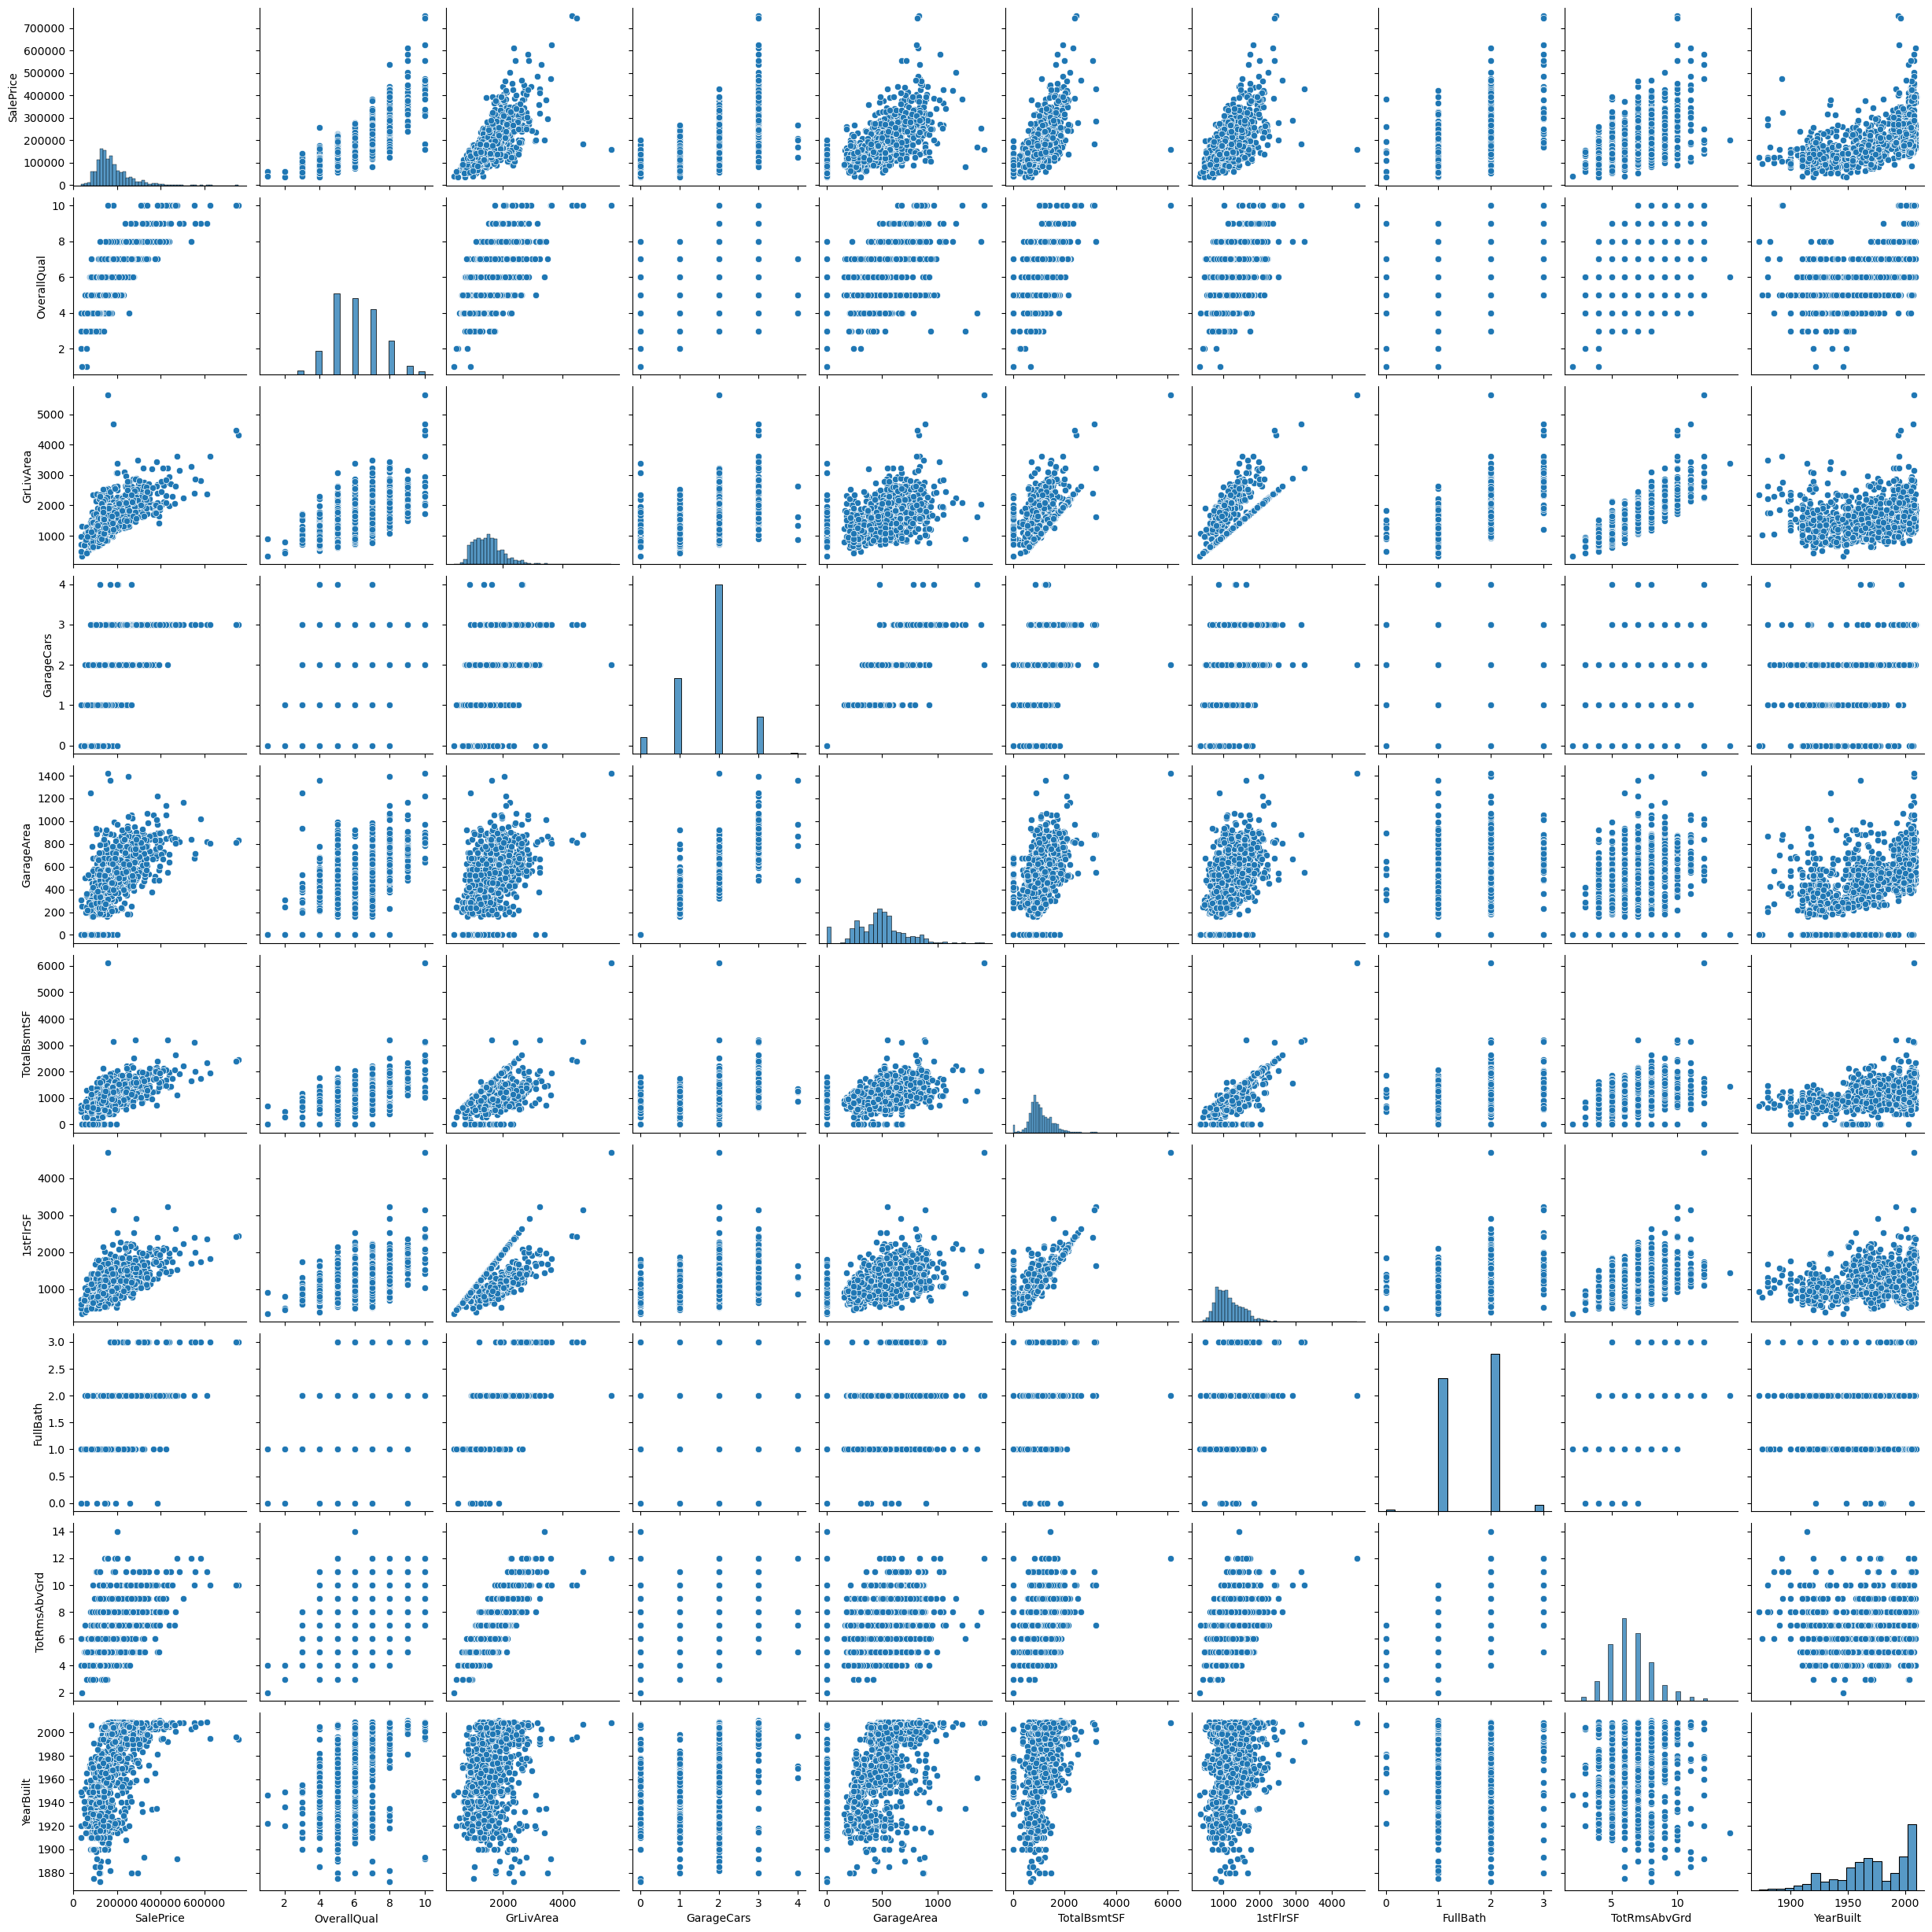

In [16]:
# correlação entre os recursos:
snc=sns.pairplot(df[["SalePrice","OverallQual","GrLivArea","GarageCars","GarageArea","TotalBsmtSF","1stFlrSF","FullBath","TotRmsAbvGrd","YearBuilt"]]);

In [17]:
# plote a distribuição para todos os recursos numéricos:

df_num = df.select_dtypes(include = ['float64', 'int64'])
df_num=df_num.drop(["Id"],axis=1)
df_num.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


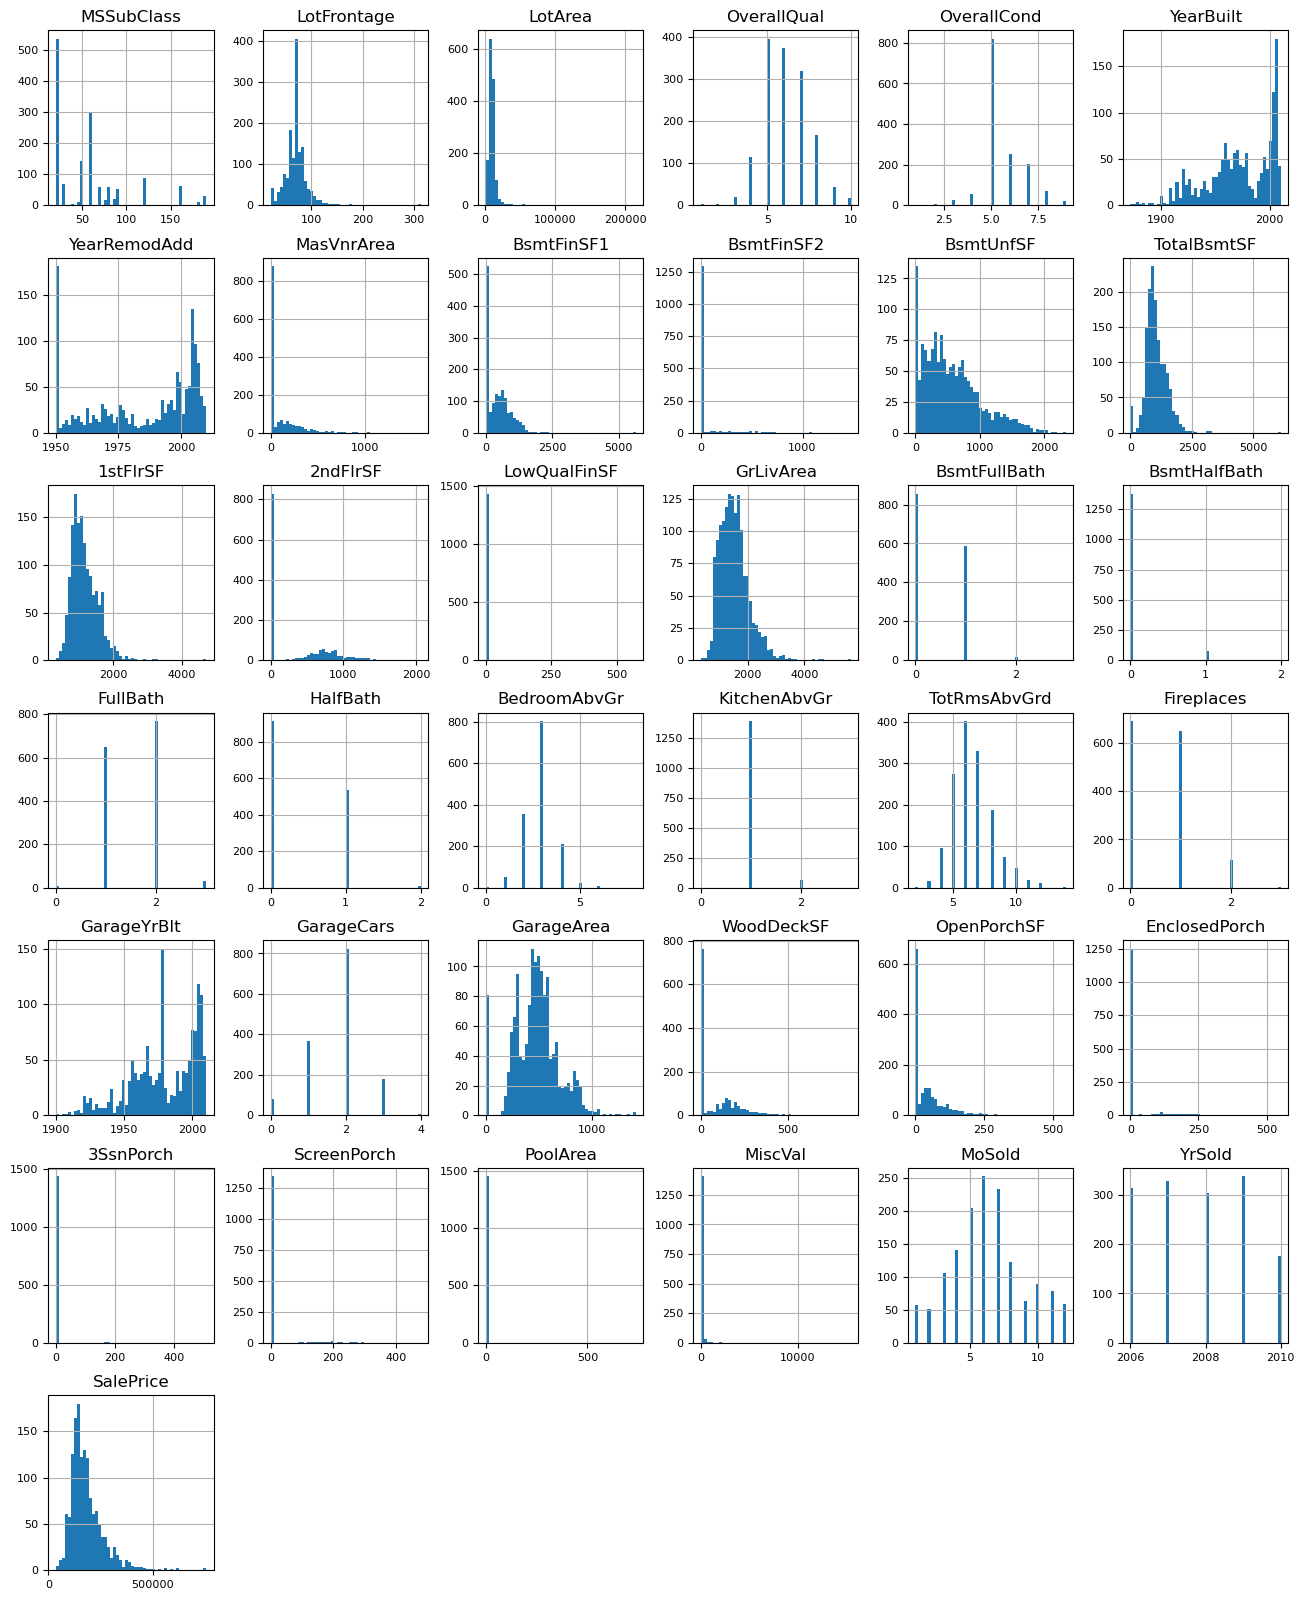

In [18]:
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

In [19]:
# Qual é a distribuição dos preços das casas no conjunto de dados?
px.histogram(df,x="SalePrice",title="Distribution of House Prices",opacity=0.8,
                 labels={"SalePrice":"Sale Price"},template="plotly_dark")

These are the most important features that influences house prices:
 SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
Name: SalePrice, dtype: float64


<Axes: >

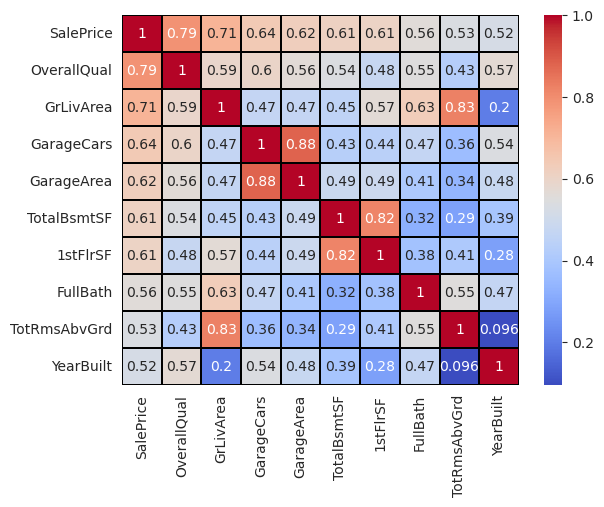

In [20]:
# Quais são as características mais importantes que influenciam os preços das casas?
a=df.corr()["SalePrice"].sort_values(ascending=False).head(10)

print("These are the most important features that influences house prices:\n",a)

sns.set_style("darkgrid")
sns.heatmap(df[a.index].corr(),annot=True,cmap="coolwarm",linewidths=0.2,linecolor="black")



In [21]:
# Detecção de outliers:
df_sales=df["SalePrice"]
px.box(df,x="SalePrice",title="Outliers Detection",template="plotly_dark")

In [22]:
# Detecção de outliers com IQR:
Q1 = df_sales.quantile(0.25)
Q3 = df_sales.quantile(0.75)
IQR = Q3-Q1 #interquartile range
Q1,Q3,IQR

(129975.0, 214000.0, 84025.0)

In [23]:
# encontrando os limites inferior e superior do preço de venda:
lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR

lower_limit,upper_limit

(3937.5, 340037.5)

In [24]:
# número de outliers no preço de venda:
((df_sales>upper_limit) | (df_sales<lower_limit)).sum() 

61

In [25]:
#3.preenchimento para trás e para frente:

outlier_lw=(df_sales<lower_limit)
outlier_upp=(df_sales>upper_limit)

df_sales[outlier_lw]=lower_limit
df_sales[outlier_lw]

df_sales[outlier_upp]=upper_limit
df_sales[outlier_upp]

px.box(df,x="SalePrice",title="Outliers Detection",template="plotly_dark")

In [26]:
# conclusão EDA:
#1. O conjunto de dados tem 1460 linhas e 81 colunas.
#2. O conjunto de dados tem 2 tipos de dados: float64(3), int64(35), object(43).
#3. O conjunto de dados tem 19 colunas com valores ausentes.
#4. O conjunto de dados tem 3 linhas duplicadas.
#5. O conjunto de dados tem 1 coluna constante.
#6. O conjunto de dados tem 1 coluna com alta cardinalidade (43).
#7. O conjunto de dados tem 1 coluna com alta correlação (GarageArea).
#8. O conjunto de dados tem 1 coluna com uma alta taxa de falta (PoolQC).

#### Preparação dos Dados e Treinamento do Modelo

In [ ]:
# Construindo um modelo para prever os preços das casas:
# removendo as colunas que possuem tipo de dados de objeto:
from sklearn.model_selection import train_test_split
numerical_cols  = df.select_dtypes(include=['int64','float64'])
numerical_cols.columns

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

# Escolhendo o modelo:
X = numerical_cols.drop(["SalePrice"],axis=1)
y = df["SalePrice"]

# Preparar modelos
models = [('RG', Ridge()),
          ('LA', Lasso()),
          ('LR', LinearRegression())]

# Avaliar cada modelo por vez
for name, regressor in models:
    rmse = np.mean(np.sqrt(-cross_val_score(regressor, X, y, cv = 5, scoring = "neg_mean_squared_error")))
    print(f"RMSE: {round(rmse, 4)} ({name}) ")

In [ ]:
# Construindo um modelo de Lasso Regression:
# Escolhi este modelo porque possui a pontuação RMSE mais baixa.

train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

target = train['SalePrice']
test_ids = test['Id']

train = train.drop(['SalePrice', 'Id'], axis = 1)
test = test.drop(['Id'], axis = 1)

dataset = pd.concat([train, test], axis = 0)
dataset.select_dtypes('object').loc[:, dataset.isna().sum()> 0].columns
categorical_with_none = [
    'Alley',
    'MasVnrType',
    'BsmtQual',
    'BsmtCond',
    'BsmtExposure',
    'BsmtFinType1',
    'BsmtFinType2',
    'FireplaceQu',
    'GarageType',
    'GarageFinish',
    'GarageQual',
    'GarageCond',
    'PoolQC',
    'Fence',
    'MiscFeature',   
]
categorical = dataset.select_dtypes('object').loc[:, dataset.isna().sum() > 0].columns

In [ ]:
for col in categorical_with_none:
    dataset[col] = dataset[col].fillna('None')
for col in categorical:
    mod = dataset[col].mode()[0]
    dataset[col] = dataset[col].fillna(mod)
    
# selecionando as colunas
dataset.select_dtypes('object').loc[:, dataset.isna().sum()> 0].columns
dataset.select_dtypes(np.number).loc[:, dataset.isna().sum() > 0].columns

In [ ]:
# Realizando preenchimento de nulos com o método KNN
def FillWithKNN(dataset, ToFill):
    df = dataset.copy()

    numeric_df = df.select_dtypes(np.number)
    non_na_columns = numeric_df.loc[:, numeric_df.isna().sum() == 0].columns
    y_train = numeric_df.loc[numeric_df[ToFill].isna() == False, ToFill]
    X_train = numeric_df.loc[numeric_df[ToFill].isna() == False, non_na_columns]
    X_test = numeric_df.loc[numeric_df[ToFill].isna() == True, non_na_columns]
    
    knn = KNeighborsRegressor(n_neighbors = 10)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)

    df.loc[df[ToFill].isna() == True, ToFill] = y_pred
    return df

# usando KNN para preencher o conjunto de dados
from sklearn.neighbors import KNeighborsRegressor
na_columns = dataset.columns[(dataset.isna().sum()) > 0]
for column in na_columns:
    dataset = FillWithKNN(dataset, column)

In [ ]:
train = dataset.iloc[:train.shape[0], :].copy()
test = dataset.iloc[train.shape[0]:, :].copy()
full = [train, test]
for ds in full:
    categories = ds.select_dtypes('object').columns
    for column in categories:
        dic = pd.concat([ds[column], target], axis = 1).groupby(column).mean().sort_values(by = 'SalePrice')
        mp = {}
        p = 0
        for it in dic.index:
            mp[it] = p
            p += 1
        ds[column] = ds[column].map(mp)
    categories = ds.select_dtypes('object').columns

In [ ]:
import math
# normalização de dados
from sklearn.preprocessing import StandardScaler
X = train.copy()
y = target.copy()
X = StandardScaler().fit_transform(X)
test = StandardScaler().fit_transform(test)

# divisão de dados
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 8, shuffle = True)

# verificando a forma
X_train.shape, X_test.shape, y_train.shape, y_test.shape

# treinando nosso modelo aprimorado
la = Lasso()
la.fit(X_train, y_train)
pred = la.predict(X_test)
print("New LA RMSE: ", math.sqrt(mean_squared_error(pred, y_test)))